# <span style="color:orange"> Using libraries 


## <span style="color:green"> CSV and Dates:


In [33]:
using CSV, DataFrames, Dates
# Read files in the root folder
list_files = readdir(joinpath(pwd(),"../"))
# Locate data index
for (index,file) in enumerate(list_files) 
    dataBool = occursin("data",file)
    if dataBool
        index_data = index
        break 
    end
    if index == length(list_files)
        println("Data folder was not located")
    end
end
# Locate and load csv file 
data_folder = joinpath(pwd(),"../data/CSV")
csv_bitcoin = joinpath(data_folder,"bitcoin.csv")
# Load csv
bitc_history = DataFrame(CSV.File(csv_bitcoin))
# Build a csv with the average of the open and end price
bit_high = bitc_history[:,"High"]
bit_low = bitc_history[:,"Low"]
bit_vol = bitc_history[:,"Volume"]
bit_mcap = bitc_history[:,"Market.Cap"]
# Replace the comma format
bit_high = replace.(bit_high, [','=>'.'])
bit_low = replace.(bit_low, [','=>'.'])
bit_vol = replace.(bit_vol, [','=>'.'])
bit_mcap = replace.(bit_mcap, [','=>'.'])
# Convert into a float
bit_high = parse.(Float32, bit_high)
bit_low = parse.(Float32, bit_low)
bit_vol = parse.(Float32, bit_vol)
bit_mcap = parse.(Float32, bit_mcap) 
# Find ATH price
max_avg_price, index_max = findmax(bit_avg_price)
# Create a date vector since firt open price
dates = collect(Date(2021, 01, 16)-Day(length(bit_avg_price)):Day(1):Date(2021, 01, 15))
# Add the date into data frame
bit_data = DataFrame(date = dates, avg_price = bit_avg_price, volume = bit_vol, market_cap = bit_mcap)
# Locate the max into a frame and plot
println("The max averge price of Bitcoin is $(bit_data[index_max,"avg_price"]) at $(bit_data[index_max,"date"])")


The max averge price of Bitcoin is 67417.68 at 2020-11-09


## <span style="color:green"> Plots:


#### <span style="color:red"> Data:

* **Poverty gap index**: The poverty gap index is the mean shortfall from the poverty line counting the non-poor as
having zero shortfall, and expressed as a percentage of the poverty line. The csv is extracted from [ouronlinedata.org](https://ourworldindata.org/grapher/poverty-gap-index-at-190-int-per-day-povcal?tab=chart&time=earliest..2019&region=SouthAmerica&country=MDG~BGD~BOL~IND~CHN~CAF~ETH)

* **Religious distribution population**: Size of major religious groups, 2020 extrected from [ths Wikipedia article](https://en.wikipedia.org/wiki/List_of_religious_populations#Adherents_in_2020)

In [3]:
# Load libraries
using CSV, DataFrames
# Read world poverty data
csv_data_folder = joinpath(pwd(),"../data/CSV")
# pig abreviatur means poverty index gap
pig_path = joinpath(csv_data_folder,"povertyIndexGap.csv")
pig = DataFrame(CSV.File(pig_path))

# Read religion distribution (reldis)
using DelimitedFiles
txt_data_folder = joinpath(pwd(),"../data/txt")
reldis_path = joinpath(txt_data_folder,"religions_distribution.txt")
reldis = readdlm(reldis_path, ',', skipstart = 0, header = false)
# Not print anaything
nothing



#### <span style="color:red"> Plot multiple lines:


Every time a `plot` instruction is executed a new figure is open, so on to plot in the same figure it is used:

```julia
plot(t,y1)
plot!(t,y2)
```

or 

```julia
plot(t,[y1 y2])
```

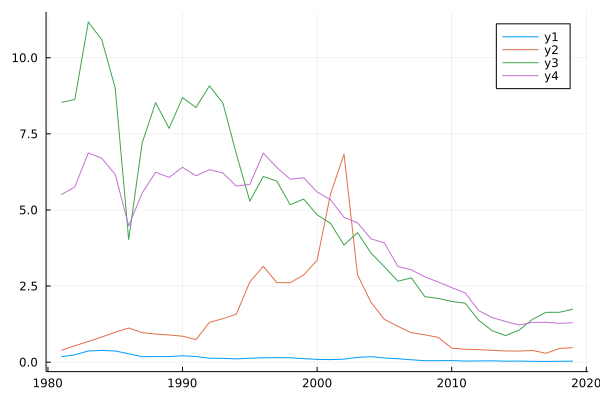

In [119]:
# Locate Uruguayan poverty index
uy_index = findall(x -> occursin("Uruguay", x), pig.Entity)
# also the index vector could be located as pig.Entity .=="Uruguay"
uy_pig = pig.PovIndex[uy_index]
uy_years = pig.Year[uy_index]
# Locate Argentinian poverty index
ar_index = findall(x -> occursin("Argentina (Urban)", x), pig.Entity)
ar_pig = pig.PovIndex[ar_index]
ar_years = pig.Year[ar_index]
# Locate Brazilian poverty index
br_index = findall(x -> occursin("Brazil", x), pig.Entity)
br_pig = pig.PovIndex[br_index]
br_years = pig.Year[br_index]
# Locate Brazilian poverty index
latinAmerica_index = findall(x -> occursin("Latin America and the Caribbean", x), pig.Entity)
latinAmerica_pig = pig.PovIndex[latinAmerica_index]
latinAmerica_years = pig.Year[latinAmerica_index]

# Excirse: compact all the lines above into a for
matrix_pig = [uy_pig ar_pig br_pig latinAmerica_pig]

# Plot gap index for UY
using Plots
# Use assert macro to check all the time refrence are the same
@assert uy_years == ar_years == br_years == latinAmerica_years "The plot time vector must be switched"
plot(uy_years, matrix_pig)


#### <span style="color:red"> Plot attributes:

By default if a `plot` instruction is executed the colours lines are set different to make it easier for the user to recognize the figure. However all the plots parameters can be set as follows:

* `style` is a vector that contains all the line style that are going to be plotted, the possible values are:
    * `:solid`(default value): a continuous line.
    * `:dash`(default value): a discontinuous line.
    * `:dot` a dotted line.
    * `:dashdot` a continuous line separated by dots.
* `width` the linewidth normalized 
* `color` this parameter define the line color. Different series are included into the library as `:red`, `:green`, `:purple`, all the colors available are given by the [CSS standard](https://www.w3.org/wiki/CSS/Properties/color/keywords). If a different color is necessary it must be added according to hexadecimal nomenclature eg: `"#00ff00"` is lime. `Aplha` parameter between 0 and 1 could be switched to select the line opacity. 
* `label` is the label used as a legend of the plot. 

This atribiutes are assigned to a data series, if only one attribute is defined so on that attribute will be applied to the hole serie. 


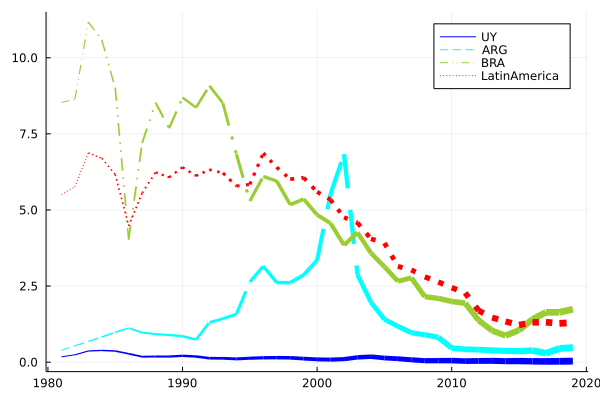

In [120]:
# Plot all the series color, width, linestyle and variable line width 
using Plots
plot(uy_years, matrix_pig,
    style = [:solid :dash :dashdotdot :dot],
    color =[:blue :cyan :yellowgreen :red],
    width = range(1,7,length=length(matrix_pig[:,1])),
    label = ["UY" "ARG" "BRA" "LatinAmerica"] )


#### <span style="color:red"> Type of plots:

3D plots can be created just adding one mor variable to the plot function:  `plot(x,y,z)`. Moreover there exists many attributes to create different type of plots, by changing `seriestype` using the following keys arguments:

* `:scatter` this create a dispersion points plot in 2D or 3D.
* `:bar` create a bar plot.
* `:quiver` create a plot with vector magnitudes and directions (require points of the origin vector, direction and magnitude).
* `:histogram` create a histogram of a data series. 
* `:surface` and `:wireframe` 3D graphs plot a colorful surfaces or mesh respectively.
* `:contour` plot 2D surfaces as iso-height curves. 

Also to create a scatter for example is identical tu use 

```julia
plot(x,y,
    seriestype = [:scatter])
```
or
```julia
scatter(x,y)
```
#### <span style="color:red"> Title axes and font size:
To configure the title of a plot and their label axes:
* To add title text `title!("Insert title here")`.
* To change the range of abscissae and ordinates use `xlims!(x_begin, x_end)` or `ylims!(y_begin, y_end)`.
* Change axis labels using `xlabel!("x axis name")` and `ylabel!("y axis name")`.
* Modifiy the fotn sizes using:
    * `xtickfont = font(size)` and `ytickfont = font(size)` to change axis numbers font size.
    * `guidefont = font(size)` to change the font labeled axis.
    * `legendfont = font(size)` to modify the legegend font size. 
* To use latex symbols and nomenclature with the library LaTeXStrings by adding a L before the legend
    * `xlabel = L"$latex code"`
    

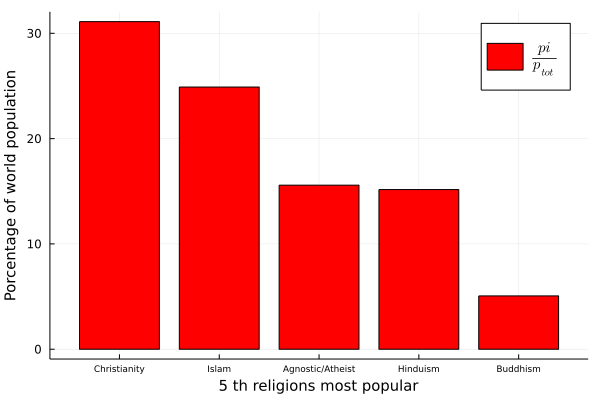

In [78]:
using Plots, LaTeXStrings
num_rel_toplot = 5 ;
bar(reldis[1:num_rel_toplot,1], reldis[1:num_rel_toplot,2],
    label  = L"$\frac{pi}{p_{tot}}$",
    xlabel = "$num_rel_toplot th religions most popular",
    ylabel = "Porcentage of world population",
    xtickfont = font(6), 
    ytickfont = font(8), 
    guidefont = font(10), 
    legendfont = font(10),
    color = :red )

#### <span style="color:red"> Create multiple plots into one plots:

The output of the function `plot` or `bar`, create objects that can be accessed to change attributes, export file images or change the plot. To create a multiple plot in one use:

```julia
p1 = plot(x,y)
p2 = plot(x,z)
p = plot(p1,p2)
```


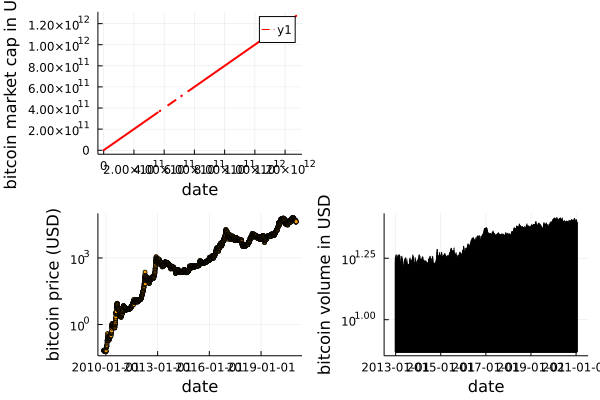

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:4080.
└ @ Plots /home/mvanzulli/.julia/packages/Plots/9C6z9/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:4080.
└ @ Plots /home/mvanzulli/.julia/packages/Plots/9C6z9/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:4080.
└ @ Plots /home/mvanzulli/.julia/packages/Plots/9C6z9/src/utils.jl:132


In [105]:
using Plots
# Plot all bitcoin data into one single figure
price_plot = scatter(bit_data.date, bit_data.avg_price,
                     markersize = 3,
                     color = :orange, 
                     label = "",
                     xlabel = "date",
                     yaxis = :log,
                     ylabel = "bitcoin price (USD)" )
vol_plot = bar(bit_data.date[bit_data.volume .!= 0], log.(bit_data.volume[bit_data.volume .!= 0]),
               markersize = 5,
               color = :black,
               label = "",
               xlabel = "date",
               yaxis = :log,
               ylabel = "bitcoin volume in USD" )
macp_plot = plot(bit_data.market_cap, bit_data.market_cap,
            width = 2,
            style = [:dashdot],
            color = :red,
            xlabel = "date",
            ylabel = "bitcoin market cap in USD" )
# Create emppty plot
empty_plot = Plots.Plot()
final_plot = plot(macp_plot, empty_plot, price_plot, vol_plot)

# Execrise: Modificate the font size

# To save fig use:
# savefig(final_plot, "final_plot.pdf")